<a href="https://colab.research.google.com/github/A-Roopa/Brainwave_matrix_intern1/blob/main/twitter_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Import Libraries**

In [19]:
# Step 1: Import Libraries
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [2]:
# Download required NLTK data for VADER
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

**Step 2: Load the data**

In [9]:
# Define the file path
file_path = '/content/training.1600000.processed.noemoticon.csv'

# Define the column names for the dataset
columns = ['polarity', 'tweet_id', 'date', 'query', 'user', 'text']
# Try using the Python engine to handle the CSV parsing
df = pd.read_csv(file_path, encoding='ISO-8859-1', names=columns, engine='python', on_bad_lines='skip')
df



,polarity,tweet_id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1404382,4,2055024348,Sat Jun 06 08:33:10 PDT 2009,NO_QUERY,kimmiemeissner,"I need you like a heart needs a beat, but that..."
1404383,4,2055024454,Sat Jun 06 08:33:10 PDT 2009,NO_QUERY,lisamichel,love my Paris Hilton pose
1404384,4,2055024494,Sat Jun 06 08:33:10 PDT 2009,NO_QUERY,FakerParis,@mrskathcullen It's 11:30AM here still
1404385,4,2055024506,Sat Jun 06 08:33:10 PDT 2009,NO_QUERY,REAL_Ian_Morris,"@Yummymummy372 If you can, yes!"


In [8]:
# Display first few rows to confirm data is loaded
df.head()

,polarity,tweet_id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [10]:
# Check the shape of the dataset
print(f"Dataset shape: {df.shape}")

# Check for missing values
print(df.isnull().sum())


Dataset shape: (1404387, 6)
polarity    0
tweet_id    0
date        0
query       0
user        0
text        0
dtype: int64


In [12]:
# Drop any rows with missing values in 'text'
df = df.dropna(subset=['text'])

# Display updated dataset shape
print(f"Updated dataset shape: {df.shape}")

Updated dataset shape: (1404387, 6)


In [16]:
# Convert polarity: 0 remains 0 (negative), and 4 becomes 1 (positive)
df['polarity'] = df['polarity'].apply(lambda x: 1 if x == 4 else 0)

# Check updated distribution
print(df['polarity'].value_counts())


polarity
0    800000
1    604387
Name: count, dtype: int64


** Load cleaned dataset**

In [17]:
# Save the cleaned dataset to a new CSV file
df.to_csv('/content/cleaned_tweets.csv', index=False)

# Confirm that the file has been saved
print("Cleaned dataset saved to '/content/cleaned_tweets.csv'")



Cleaned dataset saved to '/content/cleaned_tweets.csv'


In [18]:
import re

# Function to clean the text
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)     # Remove mentions
    text = re.sub(r'#\w+', '', text)     # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()                  # Convert to lowercase
    return text

# Apply the function to the text column
df['cleaned_text'] = df['text'].apply(clean_text)

# Check the cleaned text
df[['text', 'cleaned_text']].head()


,text,cleaned_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats a bummer you shoulda got david ...
1,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
2,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sa...
3,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i he...


In [20]:
# Step 2: Load the Cleaned Data
file_path = '/content/cleaned_tweets.csv'
df = pd.read_csv(file_path)

In [22]:
# Step 3: Preprocessing - Convert Text Data to Numerical Format using TF-IDF
# We will use the 'text' column for analysis and the 'polarity' column as the target label
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf

TfidfVectorizer(max_df=0.7, stop_words='english')

In [24]:
# Convert the text data into TF-IDF features
X = tfidf.fit_transform(df['text'])
X
# The 'polarity' column will be our target variable (0 for negative, 4 for positive)
y = df['polarity']

<1404387x615754 sparse matrix of type '<class 'numpy.float64'>'
	with 9769427 stored elements in Compressed Sparse Row format>

**Step 4: Split Data into Training and Test Sets**

In [25]:
# Step 4: Split Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Step 5: Model Building - Logistic Regression**

In [26]:
# Step 5: Model Building - Logistic Regression
log_reg = LogisticRegression(max_iter=1000)

In [27]:
# Step 6: Model Training
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

**Step 7: Model Evaluation**

In [37]:
# Step 7: Model Evaluation
y_pred = log_reg.predict(X_test)
y_pred

array([1, 0, 1, ..., 0, 0, 0])

In [29]:
# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")



Model Accuracy: 78.61%


In [30]:
# Print classification report for detailed analysis
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81    159788
           1       0.75      0.75      0.75    121090

    accuracy                           0.79    280878
   macro avg       0.78      0.78      0.78    280878
weighted avg       0.79      0.79      0.79    280878



**Step 8: Visualizations**

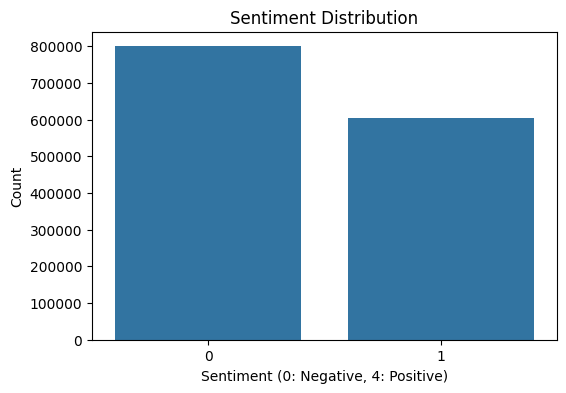

In [33]:
# 1. Sentiment Distribution
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.countplot(x='polarity', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment (0: Negative, 4: Positive)')
plt.ylabel('Count')
plt.show()


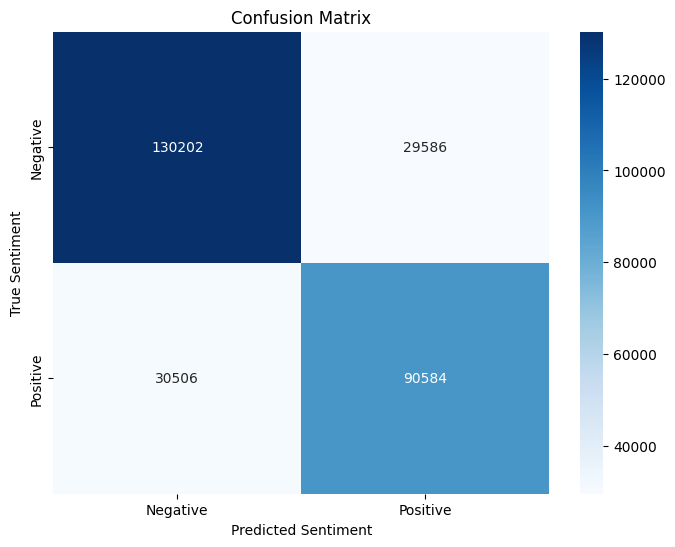

In [35]:
# 2. Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Sentiment')
plt.ylabel('True Sentiment')
plt.show()

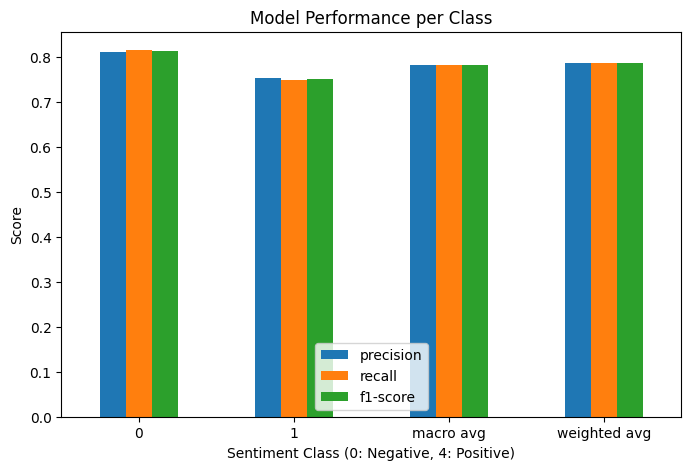

In [36]:
# 3. Accuracy Plot
accuracy_per_class = classification_report(y_test, y_pred, output_dict=True)
accuracy_df = pd.DataFrame(accuracy_per_class).T
accuracy_df = accuracy_df[['precision', 'recall', 'f1-score']]
accuracy_df = accuracy_df.drop('accuracy')

accuracy_df.plot(kind='bar', figsize=(8, 5))
plt.title('Model Performance per Class')
plt.xlabel('Sentiment Class (0: Negative, 4: Positive)')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()